In [4]:
import matplotlib.pyplot as plt

# For statistics
from scipy.stats import ttest_rel

import os,sys
sys.path.append(r'{}'.format(os.path.abspath(os.pardir)))

from wholebrain_tools import aba, genes, dataIO
import wholebrain_tools.stats as st 
import wholebrain_tools.graphics as gt

# Instantiate an Atlas object from the aba module
# The first time you run this it will download the structures.json file from the Allen Institute server
paths = dataIO.pathParser()

nodes_path = paths.structures
A = aba.Atlas(nodes = nodes_path)
DFM = aba.AnatomyDataFrameManager(A)

# Load data

In [5]:
# --------------------------------------------------------------------
searchPath = paths.alldata
channelName = 'pv'     # 'wfa' or 'pv'
# --------------------------------------------------------------------

df = dataIO.allMiceRegions(searchPath=searchPath, channelName=channelName, normCellIntens=True)
df = DFM.multiIndexDf_from_fineDf(df, verbose=True)

df.head()

While matching MID ONTOLOGY structures, 0 structures were dropped:
While matching COARSE ONTOLOGY structures, 0 structures were dropped:


mouse                   AL1A                                                 \
params                areaPx   areaMm2     diffFluo avgPxIntensity numCells   
coarse mid  fine                                                              
1097   1    1       394350.0  0.164059   18739332.0      47.519544     11.0   
315    345  2       911310.0  0.379128   22963409.0      25.198241      5.0   
1009   1009 6     23985190.0  9.978439  635635680.0      26.501173    359.0   
771    7    7     11340290.0  4.717844  426410261.0      37.601354   1146.0   
315    361  9      2282785.0  0.949696   98713830.0      43.242719    138.0   

mouse                               CC1A                          \
params           fluoCellSum      areaPx    areaMm2     diffFluo   
coarse mid  fine                                                   
1097   1    1       5.500200   1057700.0   0.440030   14291795.0   
315    345  2       2.499765   1294040.0   0.538353   25506065.0   
1009   1009 6     159.924287  26630700.0  11.079037  425232101.0   
771    7    7     363.504994  11645885.0   4.844979  522698545.0   
315    361  9      78.563814   2673075.0   1.112066   75557912.0   

mouse                            ...         CC4A                          \
params           avgPxIntensity  ...     diffFluo avgPxIntensity numCells   
coarse mid  fine                 ...                                        
1097   1    1         13.512144  ...    3059436.0       4.567652      0.0   
315    345  2         19.710415  ...   10834754.0      12.232086      9.0   
1009   1009 6         15.967740  ...  125058559.0       6.346079    253.0   
771    7    7         44.882681  ...  194251656.0      19.054713   1491.0   
315    361  9         28.266290  ...   25805713.0      11.175102    133.0   

mouse                               CC4B                          \
params           fluoCellSum      areaPx    areaMm2     diffFluo   
coarse mid  fine                                                   
1097   1    1            NaN   1105930.0   0.460095    5782274.0   
315    345  2       3.747478    938895.0   0.390604    8144723.0   
1009   1009 6      56.994977  25238750.0  10.499951  241090031.0   
771    7    7     336.466967  11113385.0   4.623446  219842888.0   
315    361  9      25.100227   1676070.0   0.697287   24558975.0   

mouse                                                 
params           avgPxIntensity numCells fluoCellSum  
coarse mid  fine                                      
1097   1    1          5.228427     14.0    1.701926  
315    345  2          8.674796     21.0    4.865534  
1009   1009 6          9.552376    476.0  138.482699  
771    7    7         19.781812   1777.0  466.454969  
315    361  9         14.652714    103.0   31.302393  

[5 rows x 42 columns]

# Visual Areas

## Barplots - Primary vs Associative

Aggregate data for this sensory system

In [6]:
sensory_df = DFM.regionsDf_to_sensorySystem(df, 
    sensorySystem='visual',     # Which sensory system to analyze
    normalize=True,             # Normalize on the brain total values
    mergeLayers=True)           # Collapse all cortical layers

sensory_df.head()

mouse              AL1A                                        CC1A  \
params          density diffuseFluo    energy intensity     density   
sensory                                                               
associative  101.171683    1.069501  1.737803  0.459587  108.473874   
primary      101.567733    1.106303  1.745284  0.459766  118.312672   

mouse                                             CC1B              ...  \
params      diffuseFluo    energy intensity    density diffuseFluo  ...   
sensory                                                             ...   
associative    0.993747  1.223805  0.463121  90.326105    0.995736  ...   
primary        1.055072  1.385156  0.480590  98.220661    0.987545  ...   

mouse            CC3A                  CC4A                                  \
params         energy intensity     density diffuseFluo    energy intensity   
sensory                                                                       
associative  1.472816  0.403782  106.824182    0.733160  0.930230  0.243056   
primary      1.754907  0.437114  115.856836    0.846643  1.151558  0.277428   

mouse              CC4B                                  
params          density diffuseFluo    energy intensity  
sensory                                                  
associative  105.399979    0.771026  0.911881  0.299301  
primary      118.907455    0.903489  1.194690  0.347582  

[2 rows x 28 columns]

### PV Energy

Rep. measures T-Test Primary vs Associative
t: 4.7769 p: 0.0031 ES:1.8055


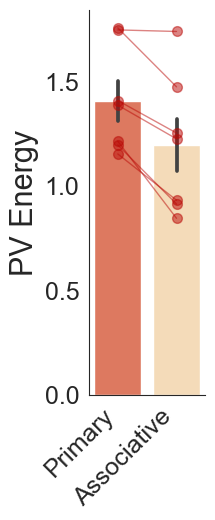

In [7]:
# Statistics
stat, pval = ttest_rel(
    sensory_df.xs('energy', axis=1, level='params').loc['primary'],
    sensory_df.xs('energy', axis=1, level='params').loc['associative'])
d = st.cohend_rel(
    sensory_df.xs('energy', axis=1, level='params').loc['primary'],
    sensory_df.xs('energy', axis=1, level='params').loc['associative'])
print(f'Rep. measures T-Test Primary vs Associative\nt: {stat:.4f} p: {pval:.4f} ES:{d:.4f}')

#Plot
gt.primaryAreasBarplot(
    sensory_df,
    metric='energy',
    cmap='OrRd',
    ylabel='PV Energy')

# plt.savefig("VIS_primaryAssociative_grouped_energy.svg", bbox_inches="tight")

### PV Diffuse Fluorescence

Rep. measures T-Test Primary vs Associative
t: 2.6249 p: 0.0393 ES:0.9921


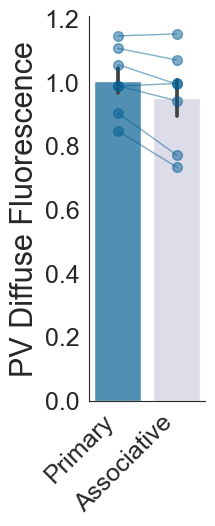

In [8]:
# Statistics
stat, pval = ttest_rel(
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['primary'],
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['associative'])
d = st.cohend_rel(
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['primary'],
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['associative'])
print(f'Rep. measures T-Test Primary vs Associative\nt: {stat:.4f} p: {pval:.4f} ES:{d:.4f}')

# Plot
gt.primaryAreasBarplot(
    sensory_df,
    metric='diffuseFluo',
    cmap='PuBu',
    ylabel='PV Diffuse Fluorescence')

# plt.savefig("VIS_primaryAssociative_grouped_diff.svg", bbox_inches="tight")

## Barplots - Split By layers

Aggregate data for this sensory system

In [9]:
sensory_df = DFM.regionsDf_to_sensorySystem(df, 
    sensorySystem='visual',     # Which sensory system to analyze
    normalize=True,             # Normalize on the brain total values
    mergeLayers=False)          # Collapse all cortical layers


sensory_df.head()

KeyError: 'Level treat not found'

### PV Energy

In [ ]:
# Statistical analysis
st.sensoryCortexByLayers(sensory_df, metric='energy', printResults=True)

# Plot
gt.primaryAreasLayersBarplot(sensory_df, 
    metric='energy',
    cmap='OrRd',
    xlabel='PV Energy (A.U.)',
    legendTitle='Visual Areas',
    fontScaling=1)

# plt.savefig("VIS_primaryAssociative_layers_energy.svg", bbox_inches="tight")

### PV Diffuse Fluorescence

In [ ]:
# Statistical analysis
st.sensoryCortexByLayers(sensory_df, metric='diffuseFluo', printResults=True)

# Plot
gt.primaryAreasLayersBarplot(sensory_df, 
    metric='diffuseFluo',
    cmap='PuBu',
    xlabel='PV Diffuse Fluorescence',
    legendTitle='Visual Areas',
    fontScaling=1)

# plt.savefig("VIS_primaryAssociative_layers_diff.svg", bbox_inches="tight")

# Auditory Areas

In [ ]:
sensory_df = DFM.regionsDf_to_sensorySystem(df, 
    sensorySystem='auditory',       # Which sensory system to analyze
    normalize=True,                 # Normalize on the brain total values
    mergeLayers=True)               # Collapse all cortical layers


sensory_df.head()

## Barplots - Primary vs Associative

### PV Energy

In [ ]:
# Statistics
stat, pval = ttest_rel(
    sensory_df.xs('energy', axis=1, level='params').loc['primary'],
    sensory_df.xs('energy', axis=1, level='params').loc['associative'])
d = st.cohend_rel(
    sensory_df.xs('energy', axis=1, level='params').loc['primary'],
    sensory_df.xs('energy', axis=1, level='params').loc['associative'])
print(f'Rep. measures T-Test Primary vs Associative\nt: {stat:.4f} p: {pval:.4f} ES:{d:.4f}')

#Plot
gt.primaryAreasBarplot(
    sensory_df,
    metric='energy',
    cmap='OrRd',
    ylabel='PV Energy')

# plt.savefig("AUD_primaryAssociative_grouped_energy.svg", bbox_inches="tight")

### WFA Diffuse Fluorescence

In [ ]:
# Statistics
stat, pval = ttest_rel(
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['primary'],
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['associative'])
d = st.cohend_rel(
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['primary'],
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['associative'])
print(f'Rep. measures T-Test Primary vs Associative\nt: {stat:.4f} p: {pval:.4f} ES:{d:.4f}')

# Plot
gt.primaryAreasBarplot(
    sensory_df,
    metric='diffuseFluo',
    cmap='PuBu',
    ylabel='PV Diffuse Fluorescence')

# plt.savefig("AUD_primaryAssociative_grouped_diff.svg", bbox_inches="tight")

## Barplots - Split By layers

In [ ]:
sensory_df = DFM.regionsDf_to_sensorySystem(df, 
    sensorySystem='auditory',       # Which sensory system to analyze
    normalize=True,                 # Normalize on the brain total values
    mergeLayers=False)              # Collapse all cortical layers


sensory_df.head()

### PV Energy

In [ ]:
# Statistical analysis
st.sensoryCortexByLayers(sensory_df, metric='energy', printResults=True)

# Plot
gt.primaryAreasLayersBarplot(sensory_df, 
    metric='energy',
    cmap='OrRd',
    xlabel='PV Energy (A.U.)',
    legendTitle='Auditory Areas',
    fontScaling=1)

# plt.savefig("AUD_primaryAssociative_layers_energy.svg", bbox_inches="tight")

### PV Diffuse Fluorescence

In [ ]:
# Statistical analysis
st.sensoryCortexByLayers(sensory_df, metric='diffuseFluo', printResults=True)

# Plot
gt.primaryAreasLayersBarplot(sensory_df, 
    metric='diffuseFluo',
    cmap='PuBu',
    xlabel='PV Diffuse Fluorescence',
    legendTitle='Auditory Areas',
    fontScaling=1)

# plt.savefig("AUD_primaryAssociative_layers_diff.svg", bbox_inches="tight")

# Somatosensory Areas

In [ ]:
sensory_df = DFM.regionsDf_to_sensorySystem(df, 
    sensorySystem='somatosensory',  # Which sensory system to analyze
    normalize=True,                 # Normalize on the brain total values
    mergeLayers=True,               # Collapse all cortical layers
    verbose=False)               


sensory_df.head()

## Barplots - Primary vs Associative

### PV Energy

In [ ]:
# Statistics
stat, pval = ttest_rel(
    sensory_df.xs('energy', axis=1, level='params').loc['primary'],
    sensory_df.xs('energy', axis=1, level='params').loc['associative'])
d = st.cohend_rel(
    sensory_df.xs('energy', axis=1, level='params').loc['primary'],
    sensory_df.xs('energy', axis=1, level='params').loc['associative'])
print(f'Rep. measures T-Test Primary vs Associative\nt: {stat:.4f} p: {pval:.4f} ES:{d:.4f}')

#Plot
gt.primaryAreasBarplot(
    sensory_df,
    metric='energy',
    cmap='OrRd',
    ylabel='PV Energy')

# plt.savefig("SS_primaryAssociative_grouped_energy.svg", bbox_inches="tight")

### PV Diffuse Fluorescence

In [ ]:
# Statistics
stat, pval = ttest_rel(
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['primary'],
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['associative'])
d = st.cohend_rel(
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['primary'],
    sensory_df.xs('diffuseFluo', axis=1, level='params').loc['associative'])
print(f'Rep. measures T-Test Primary vs Associative\nt: {stat:.4f} p: {pval:.4f} ES:{d:.4f}')

# Plot
gt.primaryAreasBarplot(
    sensory_df,
    metric='diffuseFluo',
    cmap='PuBu',
    ylabel='PV Diffuse Fluorescence')

# plt.savefig("SS_primaryAssociative_grouped_diff.svg", bbox_inches="tight")

## Barplots - Split By layers

In [ ]:
sensory_df = DFM.regionsDf_to_sensorySystem(df, 
    sensorySystem='somatosensory',  # Which sensory system to analyze
    normalize=True,                 # Normalize on the brain total values
    mergeLayers=False)              # Collapse all cortical layers


sensory_df.head()

### PV Energy

In [ ]:
# Statistical analysis
st.sensoryCortexByLayers(sensory_df, metric='energy', printResults=True)

# Plot
gt.primaryAreasLayersBarplot(sensory_df, 
    metric='energy',
    cmap='OrRd',
    xlabel='PV Energy (A.U.)',
    legendTitle='Somatosensory Areas',
    fontScaling=1)

# plt.savefig("SS_primaryAssociative_layers_energy.svg", bbox_inches="tight")

### PV Diffuse Fluorescence

In [ ]:
# Statistical analysis
st.sensoryCortexByLayers(sensory_df, metric='diffuseFluo', printResults=True)

# Plot
gt.primaryAreasLayersBarplot(sensory_df, 
    metric='diffuseFluo',
    cmap='PuBu',
    xlabel='PV Diffuse Fluorescence',
    legendTitle='Somatosensory Areas',
    fontScaling=1)

# plt.savefig("SS_primaryAssociative_layers_diff.svg", bbox_inches="tight")